In [20]:
import gymnasium as gym
import foraging_envs
from torch import nn
from convert_net import *
from stable_baselines3 import DQN
import os

from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import plot_results,  ts2xy

from stable_baselines3.common.callbacks import EvalCallback, CheckpointCallback

Create a folder structure for saving this model

In [ ]:
# create a main folder for the new saved model and associated monitor files
folder_main = "Saved Models/DQN_foraging_06_03_2024"
# folder_save = f"{folder_main}/dqn_save"

os.makedirs(folder_main, exist_ok=True)

Create the environment

In [4]:
env = gym.make("foraging_envs/foraging-two", episode_length = 100, flower_distribution = "uniform", decay_parameter = .25, travel_time = 2, render_mode = "human")
env = Monitor(env, folder_main)
check_env(env, warn=True)

Train the model, all monitor functions save here as well 

In [11]:
# make network- i will need these parameters for the copycat network
net_arch = [64, 64]
activation_fn = nn.ReLU
policy_kwargs = dict(net_arch = net_arch, activation_fn = activation_fn)

# create DQN model 
callback = EvalCallback(env, best_model_save_path=folder_main, log_path=folder_main, eval_freq=1000, deterministic=True, n_eval_episodes=5)
model = DQN("MlpPolicy", env, verbose=1, policy_kwargs = policy_kwargs)
# train the model
model.learn(total_timesteps=12000, progress_bar=False, log_interval=4, callback = callback)

# ignoring network_copy until i can put it in the saved folder


Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -15.9    |
|    exploration_rate | 0.683    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1841     |
|    time_elapsed     | 0        |
|    total_timesteps  | 400      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.266    |
|    n_updates        | 74       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -2.53    |
|    exploration_rate | 0.367    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1574     |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
| train/              |          |
|    learning_rate    | 0.0001   |
|  

In [ ]:
model.

I believe that the monitor where best model is saved has the network information that i need. So it may not be necessary to save the model separately. 

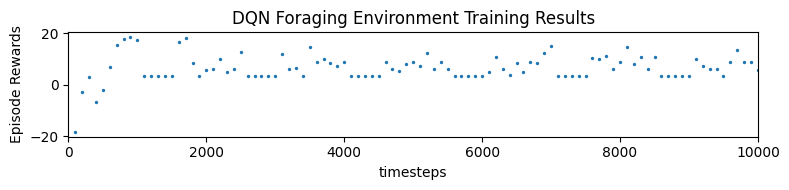

In [25]:
from  stable_baselines3.common import results_plotter

results_plotter.plot_results(
    [folder_main], 10000, results_plotter.X_TIMESTEPS, "DQN Foraging Environment Training Results"
)

In [33]:
# del model
model = DQN.load(f"{folder_main}/best_model.zip", env=env, policy_kwargs=policy_kwargs)

In [37]:
print(model.get_env())

None


Make a function to create network copy- see if it's possible to save this to the best_model.zip folder 

In [ ]:
# find net_arch and activation_fn from the model 
net_arch = model.policy.net_arch
activation_fn = model.policy.activation_fn


env = model.get_env(
state, info = env.reset()
n_observations = len(state)

network_copy_args = dict(obs_space = n_observations, action_space =env.action_space.n, net_arch = net_arch, activation_fn = activation_fn)
network_copy = CustomNetwork(network_copy_args)
network_copy = copy_weights(from_net=model, to_net = network_copy)


AttributeError: 'function' object has no attribute 'reset'

In [43]:
# print out DQN
print(model.policy._get_name())

DQNPolicy
